In [1]:
import pickle

# Define the path to the .pkl file
input_path = "/data/sr933/scRCC/combined_data/RCC_data_dict.pkl"

# Load the dictionary from the .pkl file
with open(input_path, "rb") as f:
    data_dict = pickle.load(f)

# Access the contents of the dictionary
X_combined = data_dict["X"].T
y_labels = data_dict["y"]
gene_list = data_dict["Genes"]

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import lightgbm as lgb
# Assuming X_combined and y_labels are already loaded
# Check the shape of the data
print("Shape of X_combined:", X_combined.shape)
print("Shape of y_labels:", len(y_labels))

# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_labels, test_size=0.2, random_state=42, stratify=y_labels)

num_classes=len(set(y_labels))
# Step 2: Create a Logistic Regression model with multinomial loss
clf = lgb.LGBMClassifier(objective='multiclass', num_class=num_classes, max_depth=-1, learning_rate=0.1, n_estimators=10000)

# Step 3: Train the model
clf.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = clf.predict(X_test)

# Step 5: Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Shape of X_combined: (272863, 12206)
Shape of y_labels: 272863
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 2.695005 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 107629
[LightGBM] [Info] Number of data points in the train set: 218290, number of used features: 12206
[LightGBM] [Info] Start training from score -2.939312
[LightGBM] [Info] Start training from score -3.807052
[LightGBM] [Info] Start training from score -3.400144
[LightGBM] [Info] Start training from score -1.873444
[LightGBM] [Info] Start training from score -0.941093
[LightGBM] [Info] Start training from score -4.133061
[LightGBM] [Info] Start training from score -4.332907
[LightGBM] [Info] Start training from score -1.684967
[LightGBM] [Info] Start training from score -2.016599
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

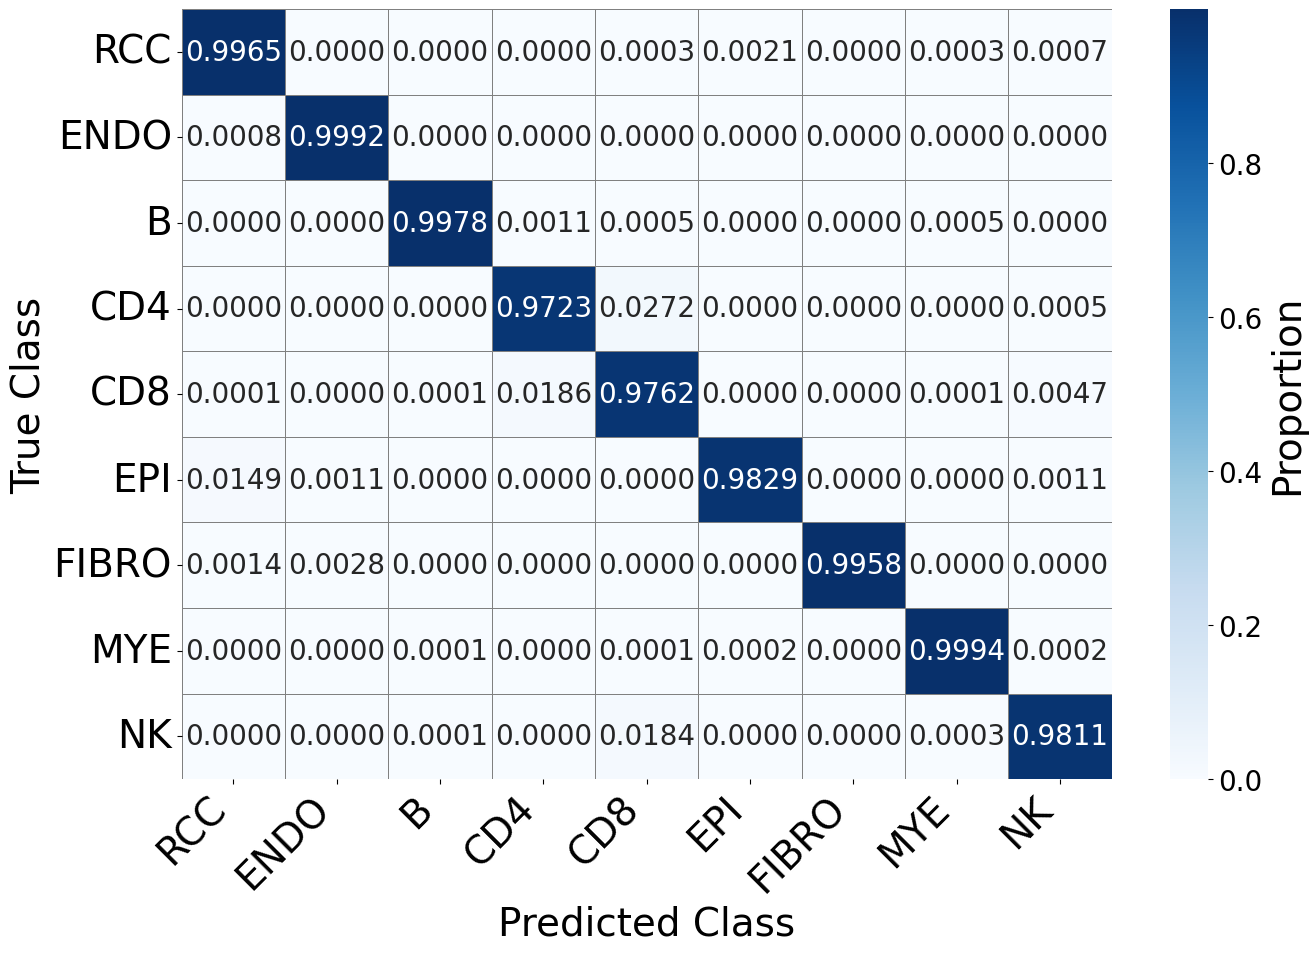

In [9]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
classes = ["RCC", "ENDO", "B", "CD4", "CD8", "EPI", "FIBRO", "MYE", "NK"]
df_cm = pd.DataFrame(cm / np.sum(cm, axis=1)[:, None], index=[i for i in classes],
                     columns=[i for i in classes])

plt.figure(figsize=(15, 10))  # Increase figure size for better readability

# Create the heatmap with increased font sizes
heatmap = sn.heatmap(
    df_cm,
    annot=True,
    fmt=".4f",
    cmap="Blues",
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={'label': 'Proportion'},
    annot_kws={"size": 20}  # Increase annotation font size
)

# Axis labels and title with increased font sizes
plt.ylabel("True Class", fontsize=28)
plt.xlabel("Predicted Class", fontsize=28)

# Ensure that axis labels are clearly visible with increased font sizes
plt.xticks(rotation=45, ha='right', fontsize=28)  # Increase x-axis tick font size
plt.yticks(rotation=0, fontsize=28)  # Increase y-axis tick font size

# Increase color bar label font size
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=20)  # Increase color bar tick font size
cbar.set_label('Proportion', fontsize=28)

# Save the plot
save_path = "/home/sr933/output/multi_cm_train.svg"  # Replace with your desired file path
plt.savefig(save_path, format="svg", bbox_inches="tight")